In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('testp.csv')

In [8]:
k = 3

In [10]:
kmeans = KMeans(n_clusters=k, random_state=0)

In [12]:
def convert_column_to_float(column):
    return pd.to_numeric(column.str.replace(',', '').str.strip(), errors='coerce')


In [14]:
for col in df.columns:
    df[col] = convert_column_to_float(df[col]) if df[col].dtype == 'object' else df[col]

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   exp               32 non-null     float64
 1   gdp               32 non-null     float64
 2   imp               32 non-null     float64
 3   Military          32 non-null     float64
 4   natural gas rent  32 non-null     float64
 5   oil               32 non-null     float64
 6   tax               32 non-null     float64
 7   unemployment      31 non-null     float64
 8   s&p               32 non-null     float64
 9   pop growth        32 non-null     float64
 10  inflalation       32 non-null     float64
dtypes: float64(11)
memory usage: 2.9 KB
None


In [18]:
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)


In [20]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df_imputed)

KMeans(n_clusters=3, random_state=0)

In [22]:
df['Cluster'] = kmeans.predict(df_imputed)


In [24]:
centroids = kmeans.cluster_centers_

In [26]:
print("Cluster centers:\n", centroids)
print("Cluster labels:\n", df['Cluster'].value_counts())

Cluster centers:
 [[3.40533300e+00 9.76831643e-01 4.16257163e+00 2.01237921e+00
  3.01678693e-03 9.99514393e-03 1.81040214e+11 9.09357143e+00
  3.38227641e+00 6.21224635e-01 1.67273191e+00]
 [6.65563528e+00 1.39667160e+00 5.01698255e+00 2.57406252e+00
  3.37568900e-03 1.14145936e-02 1.31549111e+11 1.13160215e+01
  9.16206757e+00 4.57192540e-01 2.01842935e+00]
 [1.83273018e+00 6.06442704e-01 2.56877991e+00 1.88985464e+00
  2.17341652e-04 6.68210744e-03 2.25665000e+11 9.25555556e+00
  8.57983108e+00 3.50128222e-01 8.55834065e-01]]
Cluster labels:
 Cluster
0    14
1     9
2     9
Name: count, dtype: int64


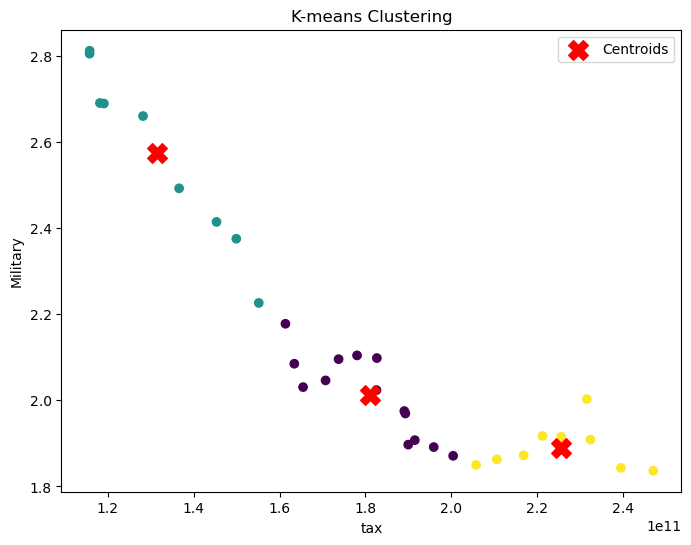

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(df['tax'], df['Military'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroids[:, df.columns.get_loc('tax')], centroids[:, df.columns.get_loc('Military')], 
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('tax')
plt.ylabel('Military')
plt.title('K-means Clustering')
plt.legend()
plt.show()